In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor

# Read the CSV 

Testing Data

In [3]:
test_file = "Resources/raw/test.csv"
test = pd.read_csv(test_file)
test_df = pd.DataFrame(test)
test_df.head(5)

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,3.0,2850.0,sqft,4200.00,sqft,98119,1175000.0
1,4,5.0,3040.0,sqft,5002.00,sqft,98106,1057500.0
2,3,1.0,1290.0,sqft,6048.00,sqft,98125,799000.0
3,3,2.0,2360.0,sqft,0.28,acre,98188,565000.0
4,3,3.5,1942.0,sqft,1603.00,sqft,98107,1187000.0


In [4]:
test_df.dtypes

beds                int64
baths             float64
size              float64
size_units         object
lot_size          float64
lot_size_units     object
zip_code            int64
price             float64
dtype: object

In [5]:
# Using VLOOKUP in Excel, found corresponding coordinates 
test_coordinates = "Resources/raw/test_coordinates_only.csv"
test_1 = pd.read_csv(test_coordinates)
test_coordinates_df = pd.DataFrame(test_1)
test_coordinates_df.head(5)

,zip_code,lat,lon
0,98119,47.6379,-122.3643
1,98106,47.5344,-122.3547
2,98125,47.7170,-122.3015
3,98188,47.4483,-122.2731
4,98107,47.6701,-122.3763


In [6]:
# Combining coordinates with test file 
test_file_updated = pd.concat([test_df, test_coordinates_df['lat'],test_coordinates_df['lon']],axis=1)
test_file_updated.head(5)

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,lat,lon
0,3,3.0,2850.0,sqft,4200.00,sqft,98119,1175000.0,47.6379,-122.3643
1,4,5.0,3040.0,sqft,5002.00,sqft,98106,1057500.0,47.5344,-122.3547
2,3,1.0,1290.0,sqft,6048.00,sqft,98125,799000.0,47.7170,-122.3015
3,3,2.0,2360.0,sqft,0.28,acre,98188,565000.0,47.4483,-122.2731
4,3,3.5,1942.0,sqft,1603.00,sqft,98107,1187000.0,47.6701,-122.3763


In [7]:
# Convert all acres under lot_size_units column to sqft 
convert_1 = test_file_updated['lot_size_units'] == "acre"
test_file_updated.loc[convert_1, 'lot_size']*=43560
test_file_updated.head(10)

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,lat,lon
0,3,3.0,2850.0,sqft,4200.0,sqft,98119,1175000.0,47.6379,-122.3643
1,4,5.0,3040.0,sqft,5002.0,sqft,98106,1057500.0,47.5344,-122.3547
2,3,1.0,1290.0,sqft,6048.0,sqft,98125,799000.0,47.7170,-122.3015
3,3,2.0,2360.0,sqft,12196.8,acre,98188,565000.0,47.4483,-122.2731
4,3,3.5,1942.0,sqft,1603.0,sqft,98107,1187000.0,47.6701,-122.3763
5,2,2.0,963.0,sqft,4753.0,sqft,98122,701000.0,47.6116,-122.3056
6,1,1.0,756.0,sqft,NaN,NaN,98105,480000.0,47.6633,-122.3022
7,4,6.0,3300.0,sqft,5810.0,sqft,98199,1795000.0,47.6488,-122.3964
8,4,2.0,2060.0,sqft,4206.0,sqft,98144,1025000.0,47.5846,-122.3005
9,1,1.0,672.0,sqft,NaN,NaN,98122,450000.0,47.6116,-122.3056


In [8]:
# Change all rows under "lot_size_units" to "sqft"
test_file_updated.loc[convert_1, 'lot_size_units']='sqft'
test_file_updated

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,lat,lon
0,3,3.0,2850.0,sqft,4200.0,sqft,98119,1175000.0,47.6379,-122.3643
1,4,5.0,3040.0,sqft,5002.0,sqft,98106,1057500.0,47.5344,-122.3547
2,3,1.0,1290.0,sqft,6048.0,sqft,98125,799000.0,47.7170,-122.3015
3,3,2.0,2360.0,sqft,12196.8,sqft,98188,565000.0,47.4483,-122.2731
4,3,3.5,1942.0,sqft,1603.0,sqft,98107,1187000.0,47.6701,-122.3763
...,...,...,...,...,...,...,...,...,...,...
500,5,4.5,5580.0,sqft,13068.0,sqft,98146,3800000.0,47.4995,-122.3603
501,3,2.5,1390.0,sqft,1570.0,sqft,98126,575000.0,47.5444,-122.3735
502,3,2.5,2950.0,sqft,20473.2,sqft,98118,3105000.0,47.5412,-122.2750
503,5,5.0,3010.0,sqft,4887.0,sqft,98115,1807000.0,47.6849,-122.2968


In [9]:
test_file_updated.drop(columns = ["size_units", "lot_size_units"], inplace = True)
test_file_updated

,beds,baths,size,lot_size,zip_code,price,lat,lon
0,3,3.0,2850.0,4200.0,98119,1175000.0,47.6379,-122.3643
1,4,5.0,3040.0,5002.0,98106,1057500.0,47.5344,-122.3547
2,3,1.0,1290.0,6048.0,98125,799000.0,47.7170,-122.3015
3,3,2.0,2360.0,12196.8,98188,565000.0,47.4483,-122.2731
4,3,3.5,1942.0,1603.0,98107,1187000.0,47.6701,-122.3763
...,...,...,...,...,...,...,...,...
500,5,4.5,5580.0,13068.0,98146,3800000.0,47.4995,-122.3603
501,3,2.5,1390.0,1570.0,98126,575000.0,47.5444,-122.3735
502,3,2.5,2950.0,20473.2,98118,3105000.0,47.5412,-122.2750
503,5,5.0,3010.0,4887.0,98115,1807000.0,47.6849,-122.2968


In [10]:
# Drop the null values
test_file_final = test_file_updated.dropna()
test_file_final.shape

(428, 8)

In [11]:
test_file_final.to_csv("Resources/Clean/test_clean.csv", index=False)

Training Data

In [12]:
train_file = "Resources/raw/train.csv"
train = pd.read_csv(train_file)
train_df = pd.DataFrame(train)
train_df.head(5)

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


In [13]:
# Using VLOOKUP in Excel, found corresponding coordinates 
train_coordinates = "Resources/raw/train_coordinates_only.csv"
train_1 = pd.read_csv(train_coordinates)
train_coordinates_df = pd.DataFrame(train_1)
train_coordinates_df.head(5)

,zip_code,lat,lon
0,98144,47.5846,-122.3005
1,98106,47.5344,-122.3547
2,98107,47.6701,-122.3763
3,98199,47.6488,-122.3964
4,98102,47.6302,-122.3210


In [14]:
# Combining coordinates with train file 
train_file_updated = pd.concat([train_df, train_coordinates_df['lat'],train_coordinates_df['lon']],axis=1)
train_file_updated.head(5)

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,lat,lon
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0,47.5846,-122.3005
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0,47.5344,-122.3547
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0,47.6701,-122.3763
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0,47.6488,-122.3964
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0,47.6302,-122.3210


In [15]:
# Convert all acres under lot_size_units column to sqft 
convert_2 = train_file_updated['lot_size_units'] == "acre"
train_file_updated.loc[convert_2, 'lot_size']*=43560
train_file_updated.head(10)

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,lat,lon
0,3,2.5,2590.0,sqft,6000.0,sqft,98144,795000.0,47.5846,-122.3005
1,4,2.0,2240.0,sqft,13503.6,acre,98106,915000.0,47.5344,-122.3547
2,4,3.0,2040.0,sqft,3783.0,sqft,98107,950000.0,47.6701,-122.3763
3,4,3.0,3800.0,sqft,5175.0,sqft,98199,1950000.0,47.6488,-122.3964
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0,47.6302,-122.3210
5,2,2.0,1190.0,sqft,43560.0,acre,98107,740000.0,47.6701,-122.3763
6,1,1.0,670.0,sqft,6000.0,sqft,98133,460000.0,47.7377,-122.3431
7,5,3.5,4510.0,sqft,6000.0,sqft,98105,3150000.0,47.6633,-122.3022
8,3,2.5,1520.0,sqft,741.0,sqft,98108,565000.0,47.5413,-122.3129
9,4,2.0,2340.0,sqft,9500.0,sqft,98178,699000.0,47.4924,-122.2359


In [16]:
# Change all rows under "lot_size_units" to "sqft"
train_file_updated.loc[convert_2, 'lot_size_units']='sqft'
train_file_updated

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,lat,lon
0,3,2.5,2590.0,sqft,6000.0,sqft,98144,795000.0,47.5846,-122.3005
1,4,2.0,2240.0,sqft,13503.6,sqft,98106,915000.0,47.5344,-122.3547
2,4,3.0,2040.0,sqft,3783.0,sqft,98107,950000.0,47.6701,-122.3763
3,4,3.0,3800.0,sqft,5175.0,sqft,98199,1950000.0,47.6488,-122.3964
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0,47.6302,-122.3210
...,...,...,...,...,...,...,...,...,...,...
2011,3,2.0,1370.0,sqft,21780.0,sqft,98112,910000.0,47.6301,-122.2972
2012,1,1.0,889.0,sqft,NaN,NaN,98121,550000.0,47.6151,-122.3447
2013,4,2.0,2140.0,sqft,6250.0,sqft,98199,1150000.0,47.6488,-122.3964
2014,2,2.0,795.0,sqft,NaN,NaN,98103,590000.0,47.6733,-122.3426


In [17]:
train_file_updated.drop(columns = ["size_units", "lot_size_units"], inplace = True)
train_file_updated

,beds,baths,size,lot_size,zip_code,price,lat,lon
0,3,2.5,2590.0,6000.0,98144,795000.0,47.5846,-122.3005
1,4,2.0,2240.0,13503.6,98106,915000.0,47.5344,-122.3547
2,4,3.0,2040.0,3783.0,98107,950000.0,47.6701,-122.3763
3,4,3.0,3800.0,5175.0,98199,1950000.0,47.6488,-122.3964
4,2,2.0,1042.0,NaN,98102,950000.0,47.6302,-122.3210
...,...,...,...,...,...,...,...,...
2011,3,2.0,1370.0,21780.0,98112,910000.0,47.6301,-122.2972
2012,1,1.0,889.0,NaN,98121,550000.0,47.6151,-122.3447
2013,4,2.0,2140.0,6250.0,98199,1150000.0,47.6488,-122.3964
2014,2,2.0,795.0,NaN,98103,590000.0,47.6733,-122.3426


In [18]:
#Drop the null values
train_file_final = train_file_updated.dropna()
train_file_final

,beds,baths,size,lot_size,zip_code,price,lat,lon
0,3,2.5,2590.0,6000.0,98144,795000.0,47.5846,-122.3005
1,4,2.0,2240.0,13503.6,98106,915000.0,47.5344,-122.3547
2,4,3.0,2040.0,3783.0,98107,950000.0,47.6701,-122.3763
3,4,3.0,3800.0,5175.0,98199,1950000.0,47.6488,-122.3964
5,2,2.0,1190.0,43560.0,98107,740000.0,47.6701,-122.3763
...,...,...,...,...,...,...,...,...
2009,3,3.5,1680.0,1486.0,98126,675000.0,47.5444,-122.3735
2010,2,2.0,1400.0,14810.4,98199,699950.0,47.6488,-122.3964
2011,3,2.0,1370.0,21780.0,98112,910000.0,47.6301,-122.2972
2013,4,2.0,2140.0,6250.0,98199,1150000.0,47.6488,-122.3964


In [19]:
train_file_final.to_csv("Resources/Clean/train_clean.csv", index=False)

In [20]:
train_file_final = train_file_final.drop(columns=["lat","lon"])
train_file_final

,beds,baths,size,lot_size,zip_code,price
0,3,2.5,2590.0,6000.0,98144,795000.0
1,4,2.0,2240.0,13503.6,98106,915000.0
2,4,3.0,2040.0,3783.0,98107,950000.0
3,4,3.0,3800.0,5175.0,98199,1950000.0
5,2,2.0,1190.0,43560.0,98107,740000.0
...,...,...,...,...,...,...
2009,3,3.5,1680.0,1486.0,98126,675000.0
2010,2,2.0,1400.0,14810.4,98199,699950.0
2011,3,2.0,1370.0,21780.0,98112,910000.0
2013,4,2.0,2140.0,6250.0,98199,1150000.0


In [21]:
# Define features and target variables
X_train = train_file_final.drop(columns='price', axis=1)
y_train = train_file_final['price']
X_train

,beds,baths,size,lot_size,zip_code
0,3,2.5,2590.0,6000.0,98144
1,4,2.0,2240.0,13503.6,98106
2,4,3.0,2040.0,3783.0,98107
3,4,3.0,3800.0,5175.0,98199
5,2,2.0,1190.0,43560.0,98107
...,...,...,...,...,...
2009,3,3.5,1680.0,1486.0,98126
2010,2,2.0,1400.0,14810.4,98199
2011,3,2.0,1370.0,21780.0,98112
2013,4,2.0,2140.0,6250.0,98199


In [22]:
y_train.shape

(1669,)

In [23]:
# Split train into train and test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.3, random_state = 0)

In [24]:
X_train.shape, y_train.shape

((1168, 5), (1168,))

In [25]:
X_test.shape, y_test.shape

((501, 5), (501,))

## Linear Regression with unscaled data

In [26]:
# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
# Print y-intercept 
print(model.intercept_)

267605296.81371135


In [28]:
# Print the beta coefficients 
print(model.coef_)

[-8.58136302e+04  6.70904886e+04  4.70180131e+02 -5.47413295e-02
 -2.72462647e+03]


In [29]:
feature_cols = ["beds","baths","size","lot_size","zip_code"]

In [30]:
# List the features sorted in descending order by feature importance
sorted(zip(feature_cols, model.coef_), reverse=True)

[('zip_code', -2724.626474508367),
 ('size', 470.1801311306368),
 ('lot_size', -0.05474132952053746),
 ('beds', -85813.63022640503),
 ('baths', 67090.48863404784)]

In [31]:
# Make predictions using the model
y_pred = model.predict(X_test)
y_pred.shape

(501,)

Evaluate the Model

In [32]:
#Check model train score
linear_score_train = model.score(X_train, y_train)
linear_score_train

0.2144405341502379

In [33]:
# Check model test score
linear_score_test = model.score(X_test, y_test)
linear_score_test

0.127289561601874

In [34]:
# Print mean absolute error
metrics.mean_absolute_error(y_test, y_pred)

306819.7701578537

In [35]:
# Print Mean squared error
metrics.mean_squared_error(y_test, y_pred)

1312609928647.139

In [36]:
# Print root mean squared error
np.sqrt(metrics.mean_absolute_error(y_test, y_pred))

553.9131431531966

## Seaborn visualizations for data exploration

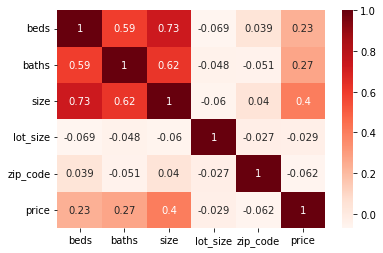

In [37]:
# Using seaborn for heatmap
heatmap = sns.heatmap(train_file_final.corr(), cmap="Reds", annot=True)     
plt.show()

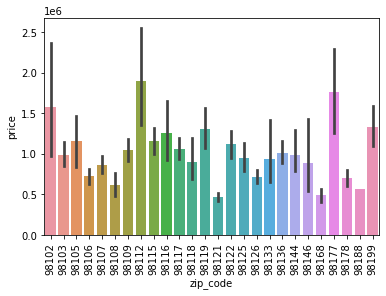

In [38]:
# Using seaborn for barplot
sns.barplot(x='zip_code', y='price', data=test_file_final)
plt.xticks(rotation=90)
plt.show()

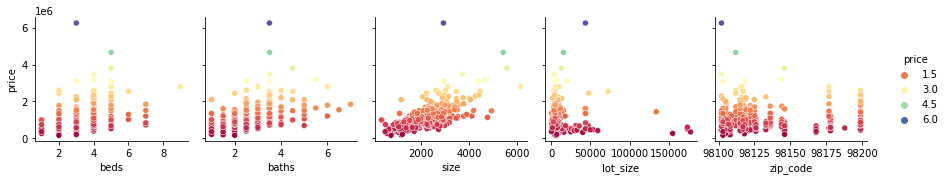

In [39]:
#pairplot showing relationship between price and the other features of the dataset
y = pd.Series(y_pred, name='price')
sns.pairplot(test_file_final, x_vars=X_test.columns, y_vars=y_test.name, hue="price", palette="Spectral")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

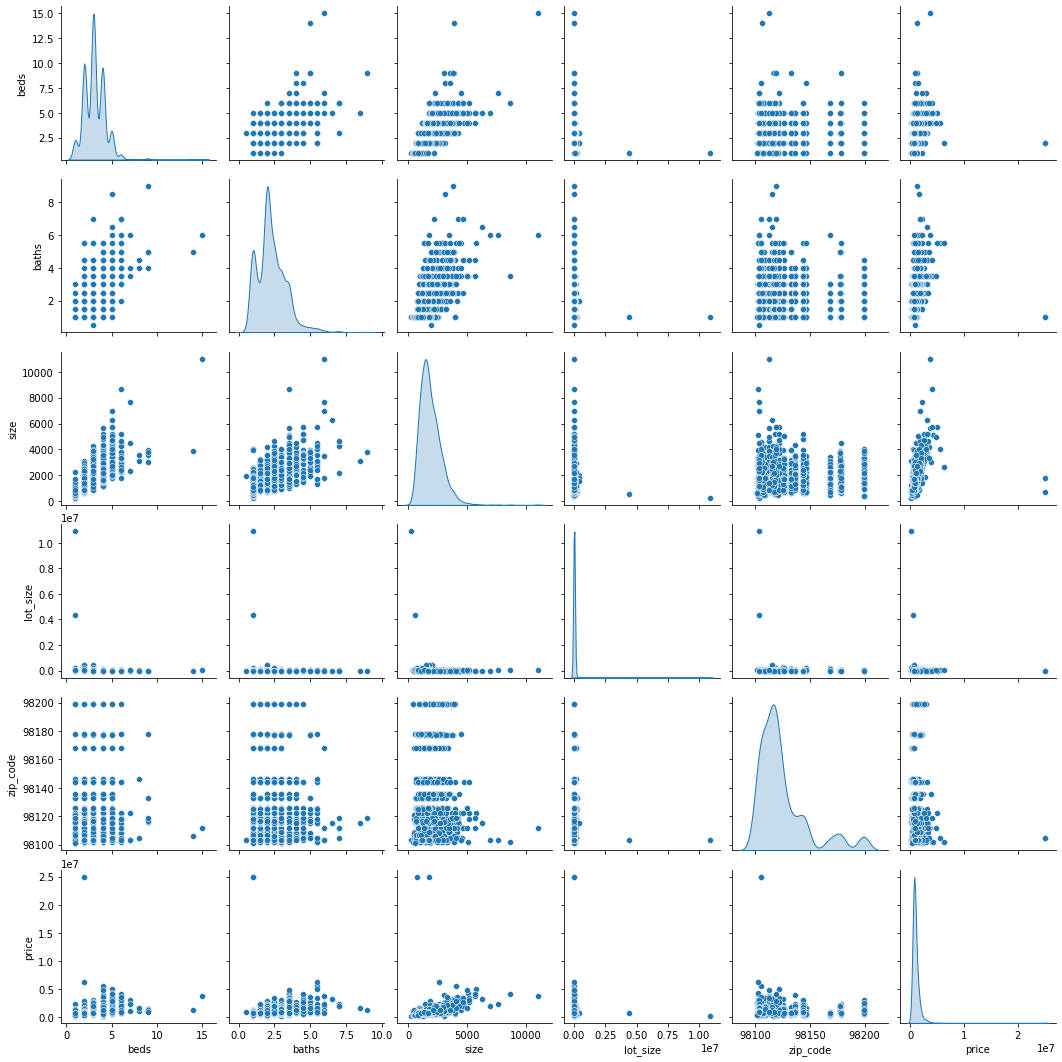

In [40]:
#Testing out visualizations to establish patterns between features
sns.pairplot(train_file_final, palette="husl", diag_kind="kde")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

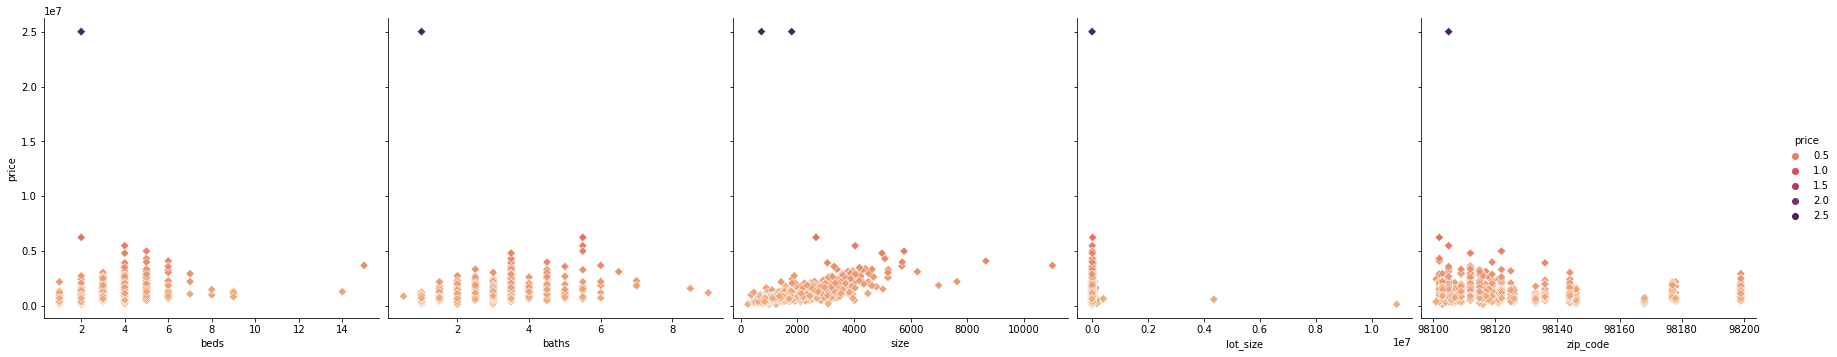

In [41]:
# Pairplots showing the relationship between price and the other model features
sns.pairplot(train_file_final, hue="price", palette="flare", height=4,  size=5, markers="D",

x_vars=["beds","baths","size","lot_size","zip_code"],
y_vars=["price"])

plt.show

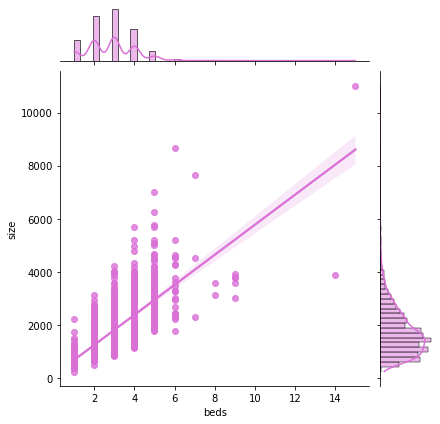

In [42]:
# Joinplot showing the relationship house sizes and the number of beds in the house
sns.jointplot(data=train_file_updated, x="beds", y="size", kind="reg", color="orchid")